# First Name: Finley
# Last Name: Sherwood

# Import Libraries  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
import matplotlib.pyplot as plt

# Import Data

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f'%x)
bottle = pd.read_csv('bottle.csv', low_memory=False)
bottle.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Date,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.44,nan,25.65,...,nan,0,nan,nan,nan,nan,nan,nan,nan,NaN
1,1,2,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,nan,25.66,...,nan,8,nan,nan,nan,nan,nan,nan,nan,NaN
2,1,3,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.44,nan,25.65,...,nan,10,nan,nan,nan,nan,nan,nan,nan,NaN
3,1,4,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.42,nan,25.64,...,nan,19,nan,nan,nan,nan,nan,nan,nan,NaN
4,1,5,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.42,nan,25.64,...,nan,20,nan,nan,nan,nan,nan,nan,nan,NaN


# Data management 

In [3]:
bottle['Depthm'] = pd.to_numeric(bottle['Depthm'], errors='coerce')
bottle['O2ml_L'] = pd.to_numeric(bottle['O2ml_L'], errors='coerce')

In [4]:
sub1 = bottle.copy()
sub1 = sub1[(sub1['Depthm'] >= 0) & (sub1['Depthm'] <= 3500)]
sub1 = sub1[(sub1['O2ml_L'] >= 0) & (sub1['O2ml_L'] <= 4)]

In [5]:
sub1['Depthm'] = pd.cut(sub1.Depthm, [500, 1000, 1500, 2000, 2500, 3000, 3500])
sub1['Depthm'] = sub1['Depthm'].astype('category') 

# Box Plot

Text(0, 0.5, 'Dissolved Oxygen Concentration')

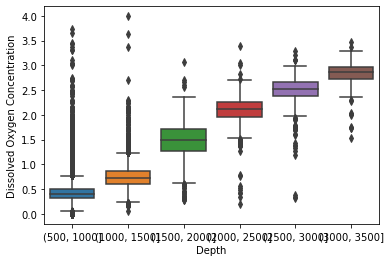

In [6]:
%matplotlib inline

sns.boxplot(x='Depthm', y='O2ml_L', data=sub1)
plt.xlabel('Depth')
plt.ylabel('Dissolved Oxygen Concentration')

# ANOVA

In [7]:
model1 = smf.ols(formula='O2ml_L ~ C(Depthm)', data=sub1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 O2ml_L   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                 6.493e+04
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        17:10:14   Log-Likelihood:                 12204.
No. Observations:               68268   AIC:                        -2.440e+04
Df Residuals:                   68262   BIC:                        -2.434e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [8]:
print('means for dissolved oxygen concentration grouped by depth')
means = sub1.groupby('Depthm').mean()
print(means['O2ml_L'])

means for dissolved oxygen concentration grouped by depth
Depthm
(500, 1000]    0.42
(1000, 1500]   0.75
(1500, 2000]   1.49
(2000, 2500]   2.10
(2500, 3000]   2.51
(3000, 3500]   2.84
Name: O2ml_L, dtype: float64


In [9]:
print('Standard deviation for dissolved oxygen concentration grouped by depth')
means = sub1.groupby('Depthm').std()
print(means['O2ml_L'])

Standard deviation for dissolved oxygen concentration grouped by depth
Depthm
(500, 1000]    0.18
(1000, 1500]   0.23
(1500, 2000]   0.34
(2000, 2500]   0.28
(2500, 3000]   0.26
(3000, 3500]   0.21
Name: O2ml_L, dtype: float64
